<a href="https://colab.research.google.com/github/LucasFaleirosMoreira/trabalhoPL_an-lise_gr-fica/blob/main/principal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho da disciplina Programação Linear ministrada pelo professor Junior Bonafim.**


---


**Contexto da atividade:** Uma empresa possui uma equipe que trabalha sete dias por semana em turnos de trabalho de
mesmo tempo. A equipe possui n funcionarios. Cada funcionario deve ter 5 folgas durante o
mes e para garantir que o trabalho seja realizado de forma competente todos os dias, a equipe
nao pode operar com menos que l funcionarios. Por razoes contratuais nenhum funcionario pode
trabalhar por 6 dias seguidos sem folgas e ao menos uma das folgas deve ocorrer em um domingo
ou em um feriado. Os funcionarios sao consultados e indicam datas preferenciais para folgas.
Construa um modelo de otimizacao que determine a escala dos funcionarios para o mes de junho
de 2025 que:

**a)** Maximize o numero total de folgas nos dias requisitados pelos funcionarios.

**b)** Distribua as folgas nos dias requisitados de maneira mais equilibrada possıvel entre os
funcionarios.


---



**Observação importante:
O algoritmo de otimização foi realizado em outro código, esse notebook tem apenas o foco em mostrar gráficos e dados estatísticos extraídos do processo de otimização proposto na atividade.**

# **Resumo gráfico e estatístico da questão A)**

In [44]:
import seaborn as srn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import statistics as sts

In [85]:
dados = pd.read_csv("/dadosPL.csv", sep = ";")

In [49]:
#Listas dos resultados de folgas atendidas por funcionarios em cada instancia.
instancias = {"inst1": [1, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 1, 2, 2, 1, 2, 1],
              "inst2": [1, 3, 3, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 4, 3, 2, 1, 2],
              "inst3": [2, 1, 3, 2, 3, 2, 3, 3, 3, 3, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 4, 3, 2, 2, 3, 2, 3, 3, 2],
              "inst4": [2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3, 3, 2, 2, 2, 1, 2, 3, 3, 2],
              "inst5": [2, 2, 2, 2, 3, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2],
              "inst6": [1, 1, 2, 2, 3, 2, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3],
              "inst7": [3, 3, 2, 2, 1, 3, 2, 2, 1, 2, 1, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 4, 3, 3, 2, 3, 3, 1, 2, 2, 2],
              "inst8": [2, 1, 2, 2, 1, 3, 1, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 4, 3, 2, 3, 2, 4, 1, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 1, 3, 2, 1, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 4, 2, 3, 2]}

#Mediana de cada instancia
medias = [sts.mean(valores) for valores in instancias.values()]
medias

[2.15,
 2.2,
 2.3666666666666667,
 2.1142857142857143,
 2.175,
 2.1333333333333333,
 2.24,
 2.2666666666666666]

In [86]:
#Tabela principal com todos os dados
dados.head(8)

,N_Funcionarios,N_min_Funcionarios,Folgas_Atendidas,Minimo_folgas,Funcionarios_minimo_folgas,Maximo_folgas,Funcionarios_maximo_folgas,Total_Folgas_Requisitadas,Total_Folgas_Atendidas
0,20,15,53.75,1,4,3,7,80,43
1,25,19,55.00,1,3,4,1,100,55
2,30,23,59.17,1,2,4,1,120,71
3,35,27,52.86,1,4,3,8,140,74
4,40,31,54.37,1,2,4,1,160,87
5,45,35,53.33,1,6,3,12,180,96
6,50,39,56.00,1,6,4,1,200,112
7,60,47,56.67,1,5,4,3,240,136


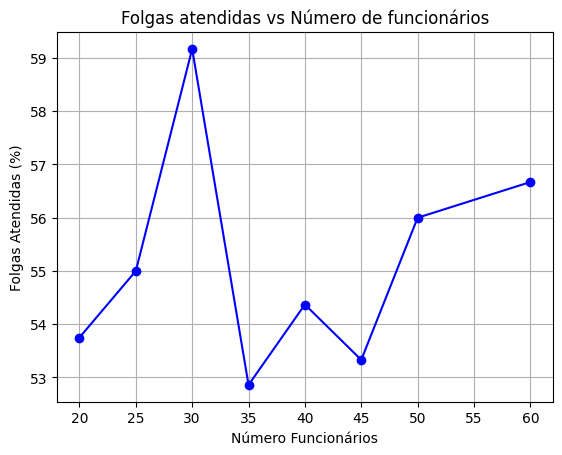

In [42]:
#Linha de evolução (gráfico de dispersão) das folgas atendidas conforme o número de funcionários aumenta
#mostrando como a otimização responde às mudanças na quantidade de funcionários
plt.plot(dados["N_Funcionarios"], dados["Folgas_Atendidas"], color="blue", marker="o")
plt.title("Folgas atendidas vs Número de funcionários")
plt.xlabel("Número Funcionários")
plt.ylabel("Folgas Atendidas (%)")
plt.grid(True)

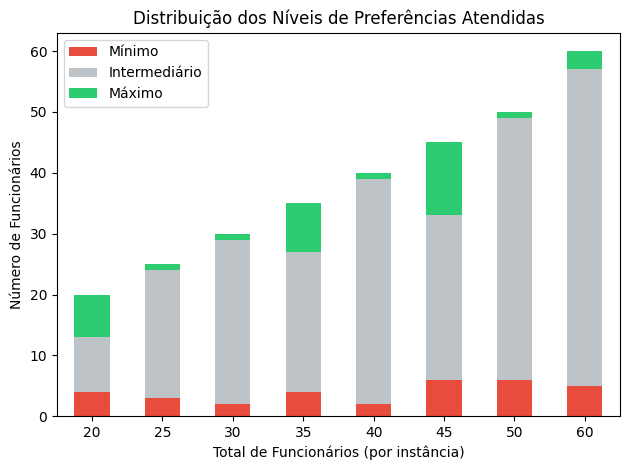

In [43]:
#Gráfico de barras mostrando quantos funcionarios tiveram o minimo de folgas atendidas e quantos tiveram o maximo de folgas atendidas
dados["Outros"] = dados["N_Funcionarios"] - (dados["Funcionarios_minimo_folgas"] + dados["Funcionarios_maximo_folgas"])

dados.plot(x="N_Funcionarios",kind="bar", stacked=True, y=["Funcionarios_minimo_folgas", "Outros", "Funcionarios_maximo_folgas"], color=["#e74c3c", "#bdc3c7", "#2ecc71"], legend=True)

plt.title("Distribuição dos Níveis de Preferências Atendidas")
plt.ylabel("Número de Funcionários")
plt.xlabel("Total de Funcionários (por instância)")
plt.xticks(rotation=0)
plt.legend(["Mínimo", "Intermediário", "Máximo"])
plt.tight_layout()
plt.show()

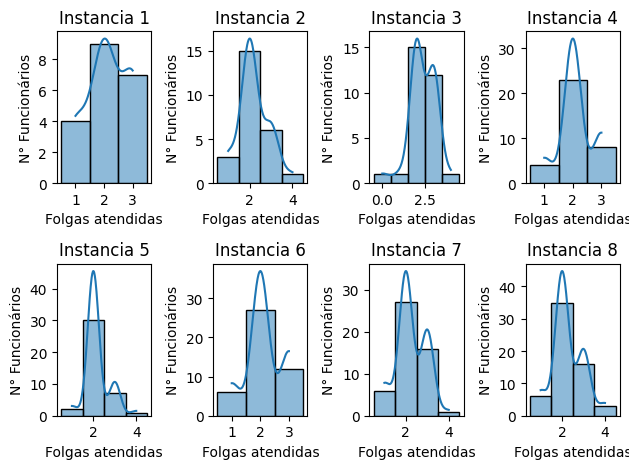

In [84]:
plt.figure()
i = 0
for valores in instancias.values():
  i += 1
  plt.subplot(2, 4, i)
  srn.histplot(valores, discrete=True, kde=True).set(title = f"Instancia {i}", ylabel = "N° Funcionários", xlabel = "Folgas atendidas")


plt.tight_layout()

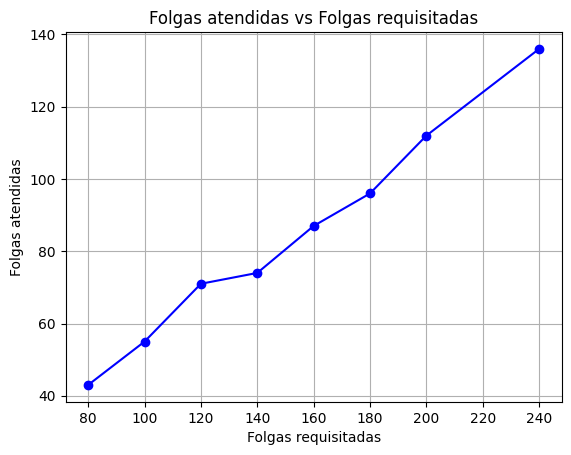

In [93]:
plt.plot(dados["Total_Folgas_Requisitadas"], dados["Total_Folgas_Atendidas"], color="blue", marker="o")
plt.title("Folgas atendidas vs Folgas requisitadas")
plt.xlabel("Folgas requisitadas")
plt.ylabel("Folgas atendidas")
plt.grid(True)

# **Resumo gráfico e estatístico da questão B)**